## DS593: Assignment 3 Notebook
Just my working notes here. Final polished answers go in the report.


In [1]:
from IPython.display import Image

## Part 1: Plain Aggregates and Privacy


In [2]:
# Call the client to retrieve the count of users by age who like music
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

### Linking Attack - Reasoning and Public Information

After reviewing the aggregate results, I searched for publicly available information about **Kinan Bab** to see whether I could connect any of it to the dataset.

---

### Question 1

> What can you nevertheless learn about Kinan's musical tastes?
> What possible genres might they have chosen?
> Alternatively, what genres is it impossible for them to have chosen?

#### Answer - Music Preference
Obviously Kinan should be more than 27 at least so we can execluse all the answers below that.
Now we will stalk Kinan to know the answer.


From different public sources, I found the following clues:

* On **X (formerly Twitter)**, I found a friend of Kinan’s replying to him in posts that frequently mentioned *metal* music.
* On **Kinan’s personal website**, he referenced the metal band *Vildhjarta*, specifically their album *“+ där skogen sjunger under evighetens granar +”* (which is metal).
* Based on Kinan’s personality, *pop* seems too ordinary for him 😄

All this strongly suggests that **metal** is Kinan’s preferred music genre.

---

### Question 2

> What did you find out about Kinan? Are your findings consistent with Question 1?
> Combine the two together to learn Kinan's exact age.

#### Answer - Age Estimation

On [**LinkedIn**](https://www.linkedin.com/in/kinanbab/), Kinan lists his education timeline:

* Bachelor’s degree: around **2012 - 2015**
* Master’s degree: around **2016 - 2020**
* PhD: completed in **2025**

Assuming a typical academic path:

* Start Bachelor’s at 18 → finish at 22 (4 years)
* Master’s 23 → 27 (4 years)
* PhD 27 → 31 (5 years)

This suggests Kinan’s current age is approximately **31 years old**.

Comparing this to the dataset (most people 19 - 25), it is clear that he is older. The only other possible age is 32.

Why not 32? The dataset shows that ages 31 and 32 each have only one record. He could be either the metal or pop entry, but based on personality and prior findings, **metal fits best**.

---

### Linking the Aggregate Data

By combining these insights:

* The dataset shows counts by **(age, genre)**
* From public data, we know Kinan is **31 years old** and prefers **metal**
* If the aggregate output contains `(age = 31, genre = metal)` with a **count of 1**, that record almost certainly corresponds to **Kinan Bab**

Even though the dataset contains *no explicit identifiers*, linking publicly available information allows **re-identification**.





In [3]:
# Call the client to retrieve the count of users by age and color preference
!python3 client.py count age color


| age                           | color                         | COUNT                         | 
| 19                            | Blue                          | 1                             | 
| 20                            | Blue                          | 1                             | 
| 21                            | Black                         | 1                             | 
| 21                            | Green                         | 2                             | 
| 22                            | Black                         | 2                             | 
| 22                            | Blue                          | 4                             | 
| 23                            | Black                         | 2                             | 
| 23                            | Yellow                        | 1                             | 
| 24                            | Blue                          | 2                             | 
| 24     

### Question 3

> Identify Kinan's favorite color. What is it? How easy or obvious is this to do, and why?

#### Answer - Favorite Color

Since we already know Kinan is 31 years old and loves *metal* music, we can reasonably guess that his favorite color is **black** from the dataset. 
Also, it fits his musical taste and overall aesthetic.


In [4]:
# Call the client to retrieve the count of users by age group and sport preference
!python3 client.py count agegroup sport


| agegroup                      | sport                         | COUNT                         | 
| 15-20                         | Basketball                    | 1                             | 
| 20-25                         | American Football             | 1                             | 
| 20-25                         | Baseball                      | 3                             | 
| 20-25                         | Basketball                    | 5                             | 
| 20-25                         | E-Sports                      | 4                             | 
| 20-25                         | Hockey                        | 3                             | 
| 25-30                         | American Football             | 1                             | 
| 25-30                         | E-Sports                      | 2                             | 
| 25-30                         | Hockey                        | 2                             | 
| 25-30  

### Question 4

> What information can you learn about Kinan's favorite sport from the above query?

#### Answer - Favorite Sport Reasoning

This one is a bit trickier because I don’t know his exact age group bucket. Since Kinan is above 30, I can ignore all responses from people under 30 and focus on the last two groups.

Since we don't have another information yet the options could be **baseball** or **e-sports**. 

However, if we have last year's table: 


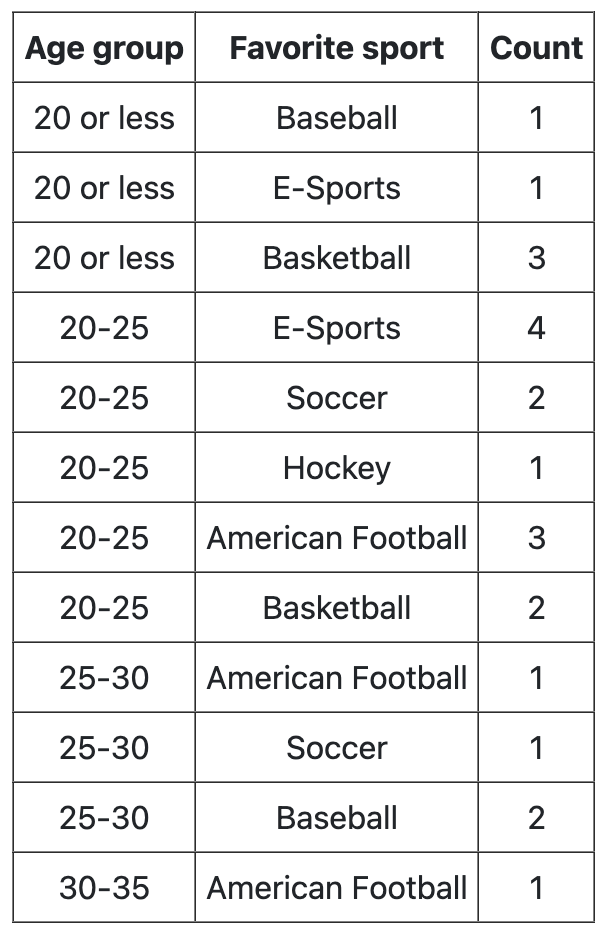

Using last year’s table and the overlap with this dataset:

- Kinan’s age last year would have been around 30 or 31  
- That places him among the last four rows of the table  
- The only matching option between datasets is **baseball**  

So based on context and dataset overlap, **baseball** seems most likely.


---

### Question 5

> What is Kinan's favorite sport?

#### Answer - Final Guess

Putting it all together from the reasoning above:  
**Kinan’s favorite sport is baseball**.  

## Part 2: Implementing Differential Privacy

In [5]:
# Call the client to retrieve the count of users' age and music preferences again 
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

I will try the following epsillon values [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

Using epsilon = 0.01

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 123                           | 
| 20                            | Pop                           | 15                            | 
| 21                            | Country                       | -266                          | 
| 21                            | Pop                           | -273                          | 
| 21                            | Rock                          | 27                            | 
| 22                            | Country                       | 63                            | 
| 22                            | Pop                           | -81                           | 
| 22                            | Rock                          | -133                          | 
| 23                            | Hip Hop                       | -22                  

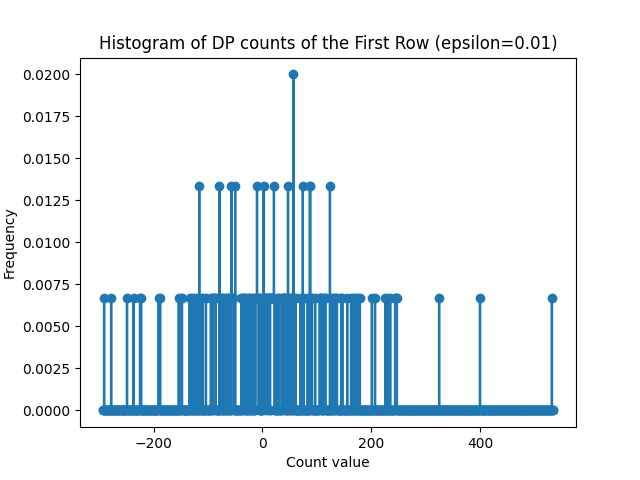

In [19]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.01
Image('dp-plot-0.01.png')

Using epsilon = 0.1

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | -26                           | 
| 20                            | Pop                           | -3                            | 
| 21                            | Country                       | 5                             | 
| 21                            | Pop                           | -10                           | 
| 21                            | Rock                          | -6                            | 
| 22                            | Country                       | -20                           | 
| 22                            | Pop                           | -16                           | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 44                    

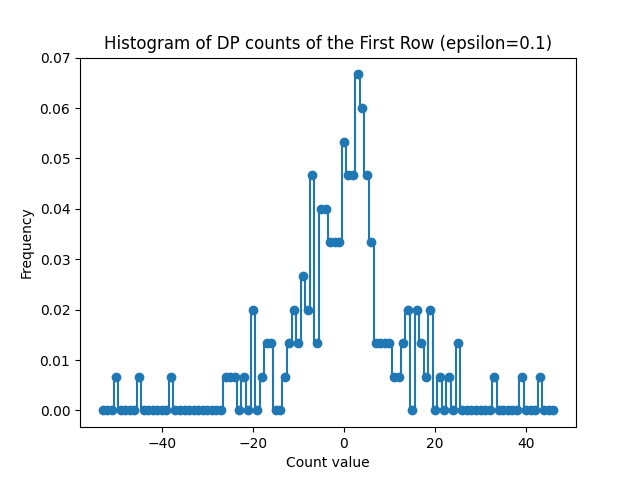

In [37]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.1
Image('dp-plot-0.1.png')

Using epsilon = 0.05

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | -33                           | 
| 20                            | Pop                           | 3                             | 
| 21                            | Country                       | 21                            | 
| 21                            | Pop                           | 58                            | 
| 21                            | Rock                          | 27                            | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | -40                           | 
| 22                            | Rock                          | -68                           | 
| 23                            | Hip Hop                       | -14                  

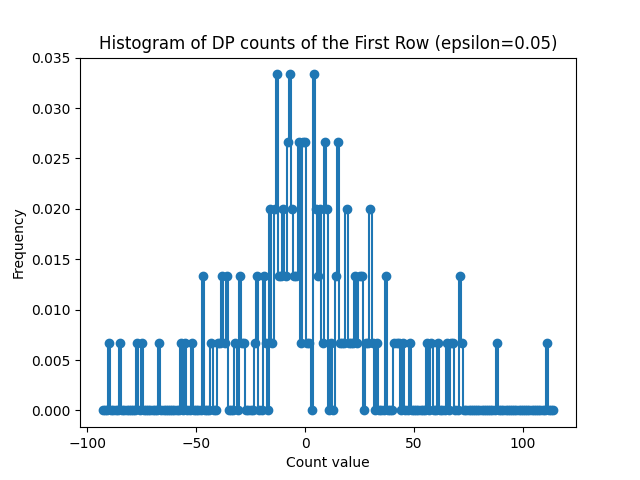

In [38]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.05
Image('dp-plot-0.05.png')

Using epsilon = 0.5

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 0                             | 
| 20                            | Pop                           | 6                             | 
| 21                            | Country                       | 0                             | 
| 21                            | Pop                           | -2                            | 
| 21                            | Rock                          | -1                            | 
| 22                            | Country                       | 3                             | 
| 22                            | Pop                           | 1                             | 
| 22                            | Rock                          | 2                             | 
| 23                            | Hip Hop                       | 0                     

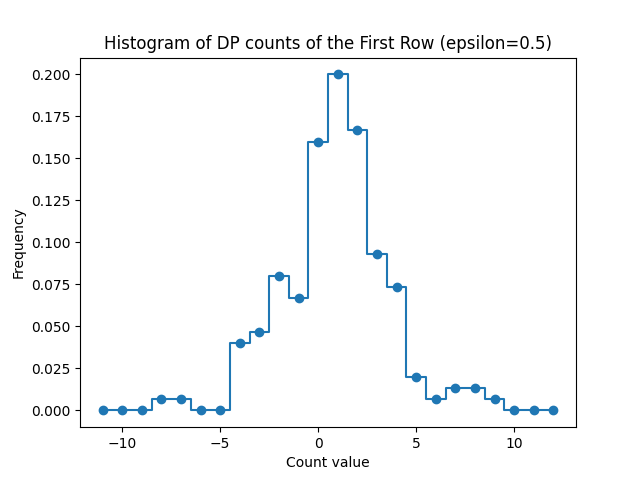

In [20]:
# Run the differential privacy script with a specified epsilon value - medium
!python3 dp.py 0.5
Image('dp-plot-0.5.png')

Using epsilon = 1.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 0                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 3                             | 
| 21                            | Rock                          | 3                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 1                             | 
| 22                            | Rock                          | 0                             | 
| 23                            | Hip Hop                       | 2                     

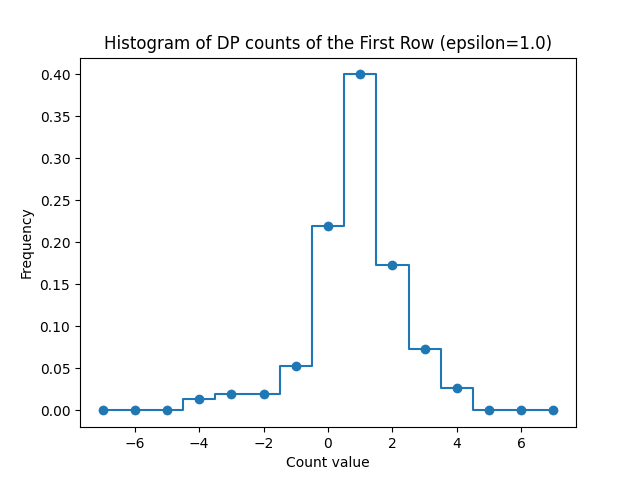

In [39]:
# Run the differential privacy script with a specified epsilon value - large
!python3 dp.py 1.0  
Image('dp-plot-1.0.png')

Using epsilon = 5.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 5                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 3                     

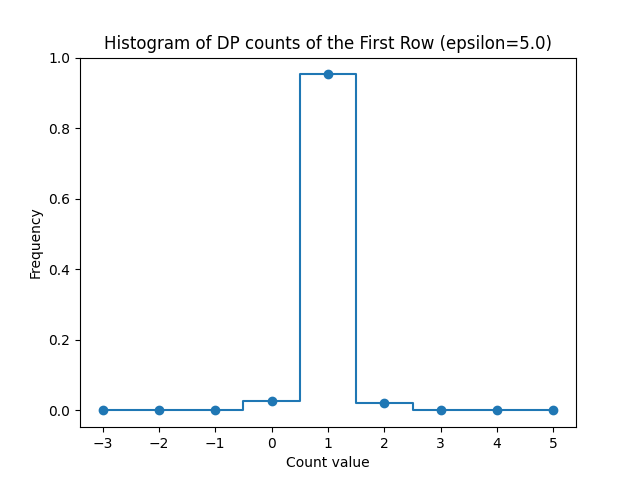

In [40]:
# Run the differential privacy script with a specified epsilon value - large
!python3 dp.py 5.0
Image('dp-plot-5.0.png')

Using epsilon = 10.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                    

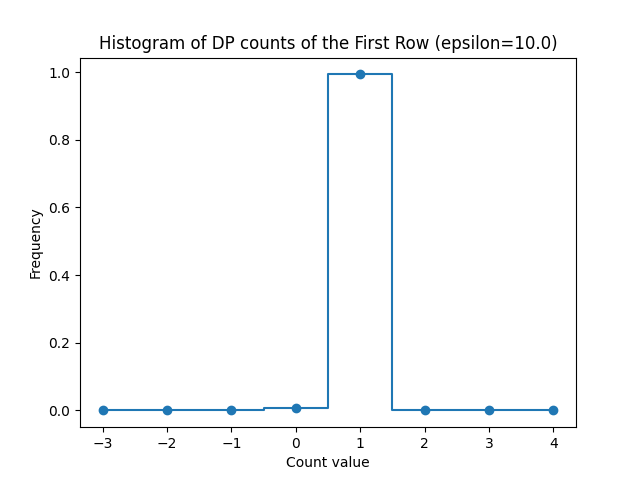

In [21]:
# Run the differential privacy script with a specified epsilon value - very large
!python3 dp.py 10.0
Image('dp-plot-10.0.png')

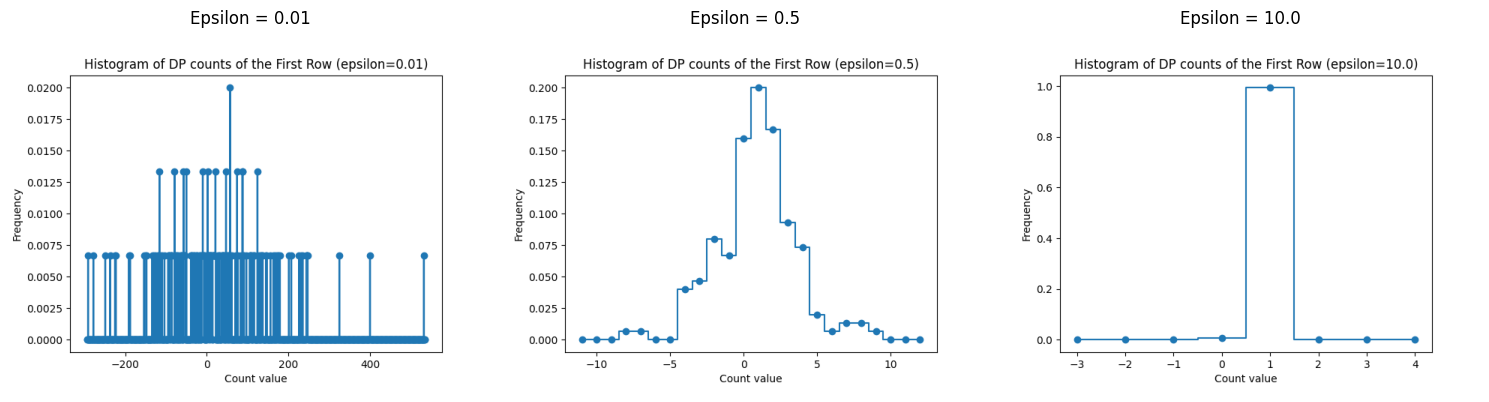

In [23]:
# Do combined plot for 0.01, 0.5, and 10.0
# I saved the plots as dp-plot-<epsilon>.png
# putting them all in one big plot for comparison
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
epsilons = [0.01, 0.5, 10.0]
for i, epsilon in enumerate(epsilons):
    img = mpimg.imread(f'dp-plot-{epsilon}.png')
    axs[i].imshow(img)
    axs[i].set_title(f'Epsilon = {epsilon}')
    axs[i].axis('off')
plt.tight_layout()
plt.savefig('dp-plot-combined.png')

### Question 6

> What happens with different ε values?

#### Answer - Observations

I ran `dp.py` with different ε values and noticed:

- **Big ε (1, 5, 10)**  
  - The counts stayed pretty close to the real values.  
  - The histogram looks accurate.  
  - Privacy is weaker since you could tell more about individual data.

- **Medium ε (0.5)**  
  - The noise is noticeable but not crazy.  
  - Some counts can still go negative, but overall it’s a good balance between privacy and accuracy.

- **Small ε (0.1, 0.05, 0.01)**  
  - The noise gets huge, sometimes giving really high or negative counts.  
  - Privacy is strong, but the histogram doesn’t look very realistic.

**In short:**  
- Small ε → strong privacy, noisy counts, some negative.  
- Medium ε (0.5) → decent privacy, mostly reasonable counts.  
- Large ε → weak privacy, counts close to true values.  


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

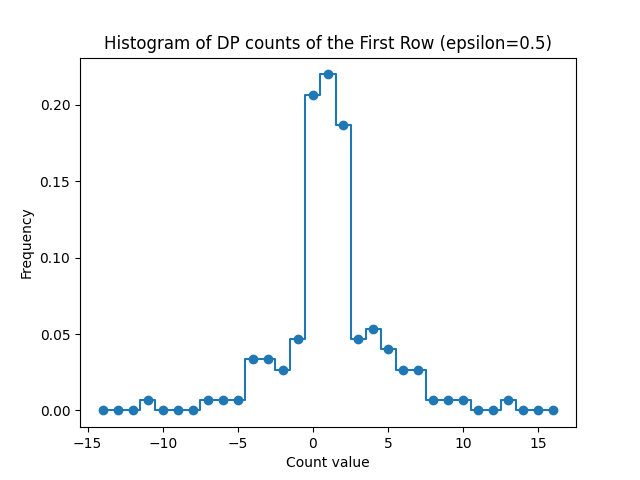

In [42]:
# Now i will call the client again and then call the dp script with epsilon 0.5 to see the difference
!python3 client.py count age music
!python3 dp.py 0.5
Image('dp-plot-0.5.png')

In [32]:
# Then we will call plot function to generate the plot for epsilon = 0.5
# and return the dp_counts value so we can analyze it
# the dp_counts variable will hold the differentially private counts to show the values 
# of the first rows across 150 iterations
import numpy as np
from dp import plot
dp_counts = plot(0.5)
# represent as numpy array
dp_counts = np.array(dp_counts)
dp_counts


array([ 1,  1,  4, -1, -1,  6,  4, -1,  2,  1,  2, -3,  2,  2,  0, -1,  2,
        0,  1,  4, -1,  0,  1,  1,  2,  2,  0, -1, -2,  1, -3,  3,  1,  0,
       -3,  2, -4,  1,  5,  0,  0,  3, -6,  0,  0, -1,  2,  1,  1,  1, -2,
        2, -2,  1,  1, -5,  1,  3,  1, -1,  1,  1, -1,  0,  1,  2, -1,  7,
        1,  1,  0,  2, -1,  1, -1,  2,  1,  8,  0,  1,  3,  4,  3,  1,  0,
        1, -3, -2, 10,  2, -1,  1, -1, -3,  2, -1,  1, -6, 10,  0,  2, -4,
        1,  3, -3,  2,  6,  2,  1,  2, -3,  1, -4,  2,  2, -1,  2,  1,  2,
       -2,  4, -3, -3, -2,  2, -4,  1,  2,  0, -1,  0,  2,  7, -4,  1, -2,
        0,  1,  8, -2,  2,  1, -9,  3,  0, -2,  1,  3,  5,  1])

In [31]:
# Now we will calculate the mode, median, and mean values of the dp_counts
from statistics import mode, median, mean
mode_value = mode(dp_counts)
print("The mode value is:", mode_value)
median_value = median(dp_counts)
print("The median value is:", median_value)
values_mean= mean(dp_counts)
print("The mean value is:", values_mean)

The mode value is: 1
The median value is: 1.0
The mean value is: 1


### Question 7: Effect of Noise on the First Row
> Look at the plot generated with privacy parameter epsilon = 0.5. What is the most likely value? What is the expected (i.e., average) value? How do they relate to the actual value (i.e., the query excuted without any noise via client.py)? How does the plot change for different values of the privacy parameter?

### Answer - First Row Values
For the first row, the true count without noise is **1**. After running the differentially private histogram 150 times with **epsilon = 0.5**, the observed statistics are:

* **Most likely value (mode):** 1
* **Median:** 1
* **Mean (average):** ~1

**Observations:**

* The mode, median, and mean all match the true count, showing that the Laplace noise didn’t significantly skew the values.
* Noise is noticeable but moderate. When repeating the query many times, the noisy counts cluster around the true value.
* Smaller epsilon values add more noise, increasing privacy but making the counts more spread out.
* Larger epsilon values reduce noise, so counts stay close to the true value, improving accuracy but weakening privacy.

So, differential privacy introduces controlled randomness. With a moderate epsilon, you get a balance between privacy and accuracy. Repeated queries, however, can eventually leak true information, which is why it’s important to manage the **privacy budget** carefully.

## Part 3: Differential Privacy and Composition

In [45]:
# Calling the client to get average age of users for each programming level
!python3 client.py dp avg age programming


| programming                   | AVG(age)                      | 
| 0-3 Years                     | 11.013                        | 
| 3-5 Years                     | 28.716                        | 
| 5-8 Years                     | 37.065                        | 
| More than 10 Years            | 20.681                        | 



In [47]:
from client import avg

# Run the DP average query multiple times to see the variation in results
for i in range(10):
    print(f"Run {i+1}:")
    headers, rows = avg(["programming"], "age", True)
    for row in rows:
        print(row)



Run 1:
('0-3 Years', 19.811)
('3-5 Years', 26.596)
('5-8 Years', -28.753)
('More than 10 Years', 49.255)
Run 2:
('0-3 Years', 0.974)
('3-5 Years', 20.999)
('5-8 Years', 6.344)
('More than 10 Years', 45.729)
Run 3:
('0-3 Years', 46.721)
('3-5 Years', 16.172)
('5-8 Years', 48.778)
('More than 10 Years', -0.757)
Run 4:
('0-3 Years', 23.67)
('3-5 Years', 19.645)
('5-8 Years', 64.116)
('More than 10 Years', -29.939)
Run 5:
('0-3 Years', 31.052)
('3-5 Years', 22.814)
('5-8 Years', -0.396)
('More than 10 Years', 42.266)
Run 6:
('0-3 Years', -20.198)
('3-5 Years', 24.94)
('5-8 Years', 29.594)
('More than 10 Years', 39.33)
Run 7:
('0-3 Years', 9.081)
('3-5 Years', 18.169)
('5-8 Years', 17.439)
('More than 10 Years', 12.313)
Run 8:
('0-3 Years', 14.015)
('3-5 Years', 30.177)
('5-8 Years', 24.906)
('More than 10 Years', 107.489)
Run 9:
('0-3 Years', -2.204)
('3-5 Years', 11.524)
('5-8 Years', 64.017)
('More than 10 Years', 13.325)
Run 10:
('0-3 Years', 35.639)
('3-5 Years', 16.788)
('5-8 Years', 

### Observations

Values vary a lot, sometimes extreme or even negative. so we will run the composition attack

In [53]:
# Iterations twice to see consistency
print("First run with median and 2000 iterations:")
!python3 composition.py
print("\nSecond run with median and 2000 iterations:")
!python3 composition.py

First run with median and 2000 iterations:
TESTING: the two histograms should be (almost) equal.

Non-noised histogram (from part 1):

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1      

### Question 8

> What does this say about Kinan’s programming experience?

The exposed averages and counts show that Kinan is most likely in either the **"5–8 Years"** or **"More than 10 Years"** programming experience group.

Since Kinan is **31 years old** and started his bachelor’s degree in 2012, it’s impossible for him to be in any category with less than 5 years of experience. That rules out the first two categories.

Looking at the remaining groups:

* **"5–8 Years"** is a good fit for his age and education.
* **"More than 10 Years"** is the best fit in my opinion, but this group has only **2 participants** with an average age of about **25–27**, which makes it a bit low for someone aged 31. To match the average, the other participant would need to be much younger, which makes this group less likely.



#### Observations from the DP results

* Each run of the DP average query produces slightly different outputs because of Laplace noise.
* The results for the last two categories usually range between **24 and 30**, so it’s hard to pinpoint exactly which group Kinan is in.
* Despite the noise, the data patterns combined with Kinan’s profile show he is in one of these final two categories.



#### Why the median was used

* Both **mean** and **median** were tested with 200 and 2000 iterations.
* The **median** gave more consistent results, especially when outliers could skew the mean.
* Both methods confirmed the accuracy of the **count table** and **music genre table** from Part 1.



#### Approach to ensure accuracy

* The composition attack was run **twice**, each with **2000 iterations**.
* More iterations reduce privacy but improve the accuracy of the results.
* Repeated runs consistently placed Kinan in the **final two categories**, matching his age and education timeline.


#### Final Conclusion

Based on the DP results and the logical reasoning, Kinan’s programming experience is most likely in the **"5–8 Years"** group, though **"More than 10 Years"** is also possible. Statistically, **"5–8 Years"** looks like the most plausible category, but personally, I think he is probably in the **"More than 10 Years"** group.






In [34]:
# Finally, we will call the client to retrieve the dp count of programming experience groups
# So we can compare and analyze the results
!python3 client.py dp count0 programming


| programming                   | COUNT                         | 
| 0-3 Years                     | 6                             | 
| 3-5 Years                     | 16                            | 
| 5-8 Years                     | 4                             | 
| More than 10 Years            | 3                             | 



### Question 9

> Using counts and averages, what can we deduce exactly?

#### Answer – Counts and Programming Experience

By running the DP count query grouped by programming experience, we were able to recover the noisy counts for each group. Although each run introduces noise, repeating the query multiple times reveals consistent patterns. Using the composition attack, we deduced the true counts used in the previous analysis: the last two categories contained **4** and **2** members, respectively. These counts align with and help explain the logic behind the previously observed average ages.

Observations:

* Kinan is **31 years old**, which is older than the averages of all groups except possibly **“5–8 Years”** or **“More than 10 Years.”**
* The **“More than 10 Years”** group has an average age around 25–27 with only **2 members**. For the average to hold, the other member would need to be unusually young ( around 20), which is unlikely possible.
* The **“5–8 Years”** group has an average age of 29 with **4 members**, which aligns well with Kinan being 31, making it the statistically most plausible group.
* Groups with **less than 5 years** of experience are impossible given Kinan’s age and educational history.

#### Final Summary About Kinan

* **Age:** 31
* **Favorite Music:** Metal
* **Favorite Sport:** Baseball
* **Programming Experience:** Most likely **5–8 years** or **“More than 10 Years”**

**Confidence:** Moderate since combining counts and averages makes other groups implausible.

**Possible Limitations:**

* Small DP noise may slightly shift averages.
* Unknown dataset members could affect group averages, making **“More than 10 Years”** plausible if additional participants exist.


In [50]:
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

In [51]:
!python budget.py


| programming                   | AVG(age)                      | 
| 0-3 Years                     | 22.439                        | 
| 3-5 Years                     | 19.563                        | 
| 5-8 Years                     | 61.37                         | 
| More than 10 Years            | 50.225                        | 


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | -2                            | 
| 20                            | Pop                           | 4                             | 
| 21                            | Country                       | 2                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 2 

### Question 10

> Does the BudgetTracker class really stop overuse?

#### Answer - Privacy Budget Enforcement
No, this class does not actually guarantee that the dataset will never be used beyond its privacy budget. It only tracks the budget in the code, which means anyone can bypass it by directly calling the underlying functions or by creating a new `BudgetTracker` instance to reset the budget. It is just a simple simulation, not real protection.

A better approach would be to enforce the privacy budget at the data system or database level. The system itself should record how much privacy budget has been used and automatically block further queries once it runs out. Real enforcement needs to happen where the data is stored, not just in the client code. Without real enforcement, composition attacks like the ones above could still leak true data.
